In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
plt.rcdefaults()

In [4]:
#Access input folder
input_dir1 = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_2_new")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2=  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()] # folder1 - RP_curves_fr7m
print ("2",input_dir2)

input G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new
2 [WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_2_new/3.00m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_2_new/RP_curves_fr05m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_2_new/RP_curves_fr07m')]


In [5]:
#dataset = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list = []

for folder1 in input_dir2:
    
    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()] # folder2 - 07m00.5kg
    
    for folder2 in input_dir3:
        
        print ('folder', folder2)
        files1 = [file1 for file1 in folder2.rglob("*.xlsx")]
    
        for file1 in files1:
            df_list.append(pd.read_excel(file1))
            print (file1.stem)
    
df = pd.concat(df_list, ignore_index = True)

folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m00.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m02.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m04.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m06.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m08.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m10.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m12.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m14.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m16.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m18.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m20.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_2_new\3.00m\3.00m22.5kg
1
2
3
4
fold

C:\Users\z5379606\AppData\Local\Temp\ipykernel_19128\2960402364.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')


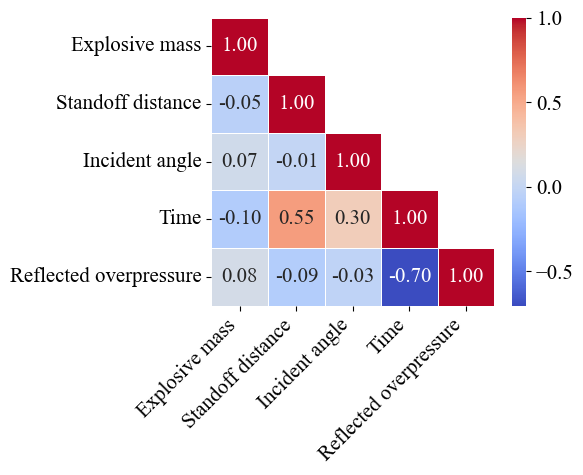

In [9]:
# Define the new column headers
new_headers = ['Explosive mass', 'Standoff distance', 'Incident angle', 'Time', 'Phase', 'Reflected overpressure']  # Adjust as per the number of columns in your DataFrame

# Assign the new headers to the DataFrame
df.columns = new_headers

# Calculate the Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(spearman_corr, dtype=bool), k=1)

# Set global font to Times New Roman (optional for aesthetics)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 15

# Plot the heatmap using seaborn with the mask
plt.figure(figsize=(6, 5))
sns.heatmap(spearman_corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title and labels
#plt.title('Spearman Correlation Coefficient Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.tight_layout()
# Save the plot as an image
plt.savefig('RP_Section2_info.png', dpi=200, facecolor='white', bbox_inches='tight')
plt.show()